# In Class Notebook, Week 08

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_obuobg_spring2025/blob/master/week08/inClass_week08.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

First we will start with the vega-editor and then come back here!

## Copying from Vega-Editor (but using Altair)

```javascript
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
}
```

In [1]:
import altair as alt

In [4]:
chart1 = alt.Chart.from_dict({
  #"$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 300, "height": 200,
  "data": {"url": "https://raw.githubusercontent.com/vega/vega-datasets/refs/heads/master/data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
})

chart1

alt.Chart(...)

## Dashboards in Altair (through vega-lite)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv')

In [7]:
df.head()

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
0,100,Johnson City,0.062199,TN,576081,1,0.021,0.090,0.035,0.030,...,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-82.436386,36.470371
1,200,Morristown,0.053652,TN,227816,1,0.020,0.093,0.026,0.028,...,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-83.407249,36.096539
2,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
3,302,Knoxville,0.056281,TN,727600,1,0.056,0.210,0.092,0.084,...,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-84.242790,35.952259
4,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276


In [8]:
df.columns

Index(['ID', 'Name', 'Mobility', 'State', 'Population', 'Urban', 'Black',
       'Seg_racial', 'Seg_income', 'Seg_poverty', 'Seg_affluence', 'Commute',
       'Income', 'Gini', 'Share01', 'Gini_99', 'Middle_class',
       'Local_tax_rate', 'Local_gov_spending', 'Progressivity', 'EITC',
       'School_spending', 'Student_teacher_ratio', 'Test_scores', 'HS_dropout',
       'Colleges', 'Tuition', 'Graduation', 'Labor_force_participation',
       'Manufacturing', 'Chinese_imports', 'Teenage_labor', 'Migration_in',
       'Migration_out', 'Foreign_born', 'Social_capital', 'Religious',
       'Violent_crime', 'Single_mothers', 'Divorced', 'Married', 'Longitude',
       'Latitude'],
      dtype='object')

What we want is a dashboard with:
1. On the "driver" left side plot a heatmap of State (y-axis) and Student-to-teacher ratio (x-axis)
2. On the responder right side plot we want a histogram of Mobility score

<AxesSubplot:ylabel='Frequency'>

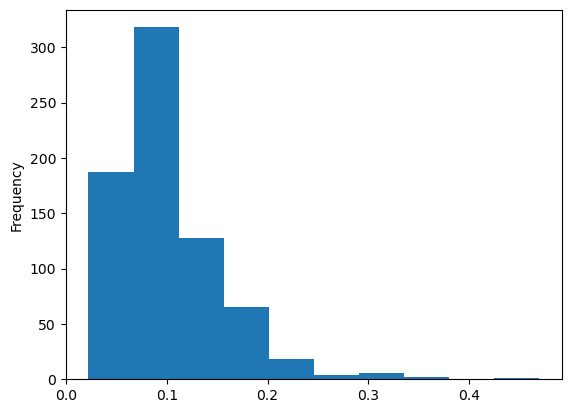

In [9]:
df['Mobility'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

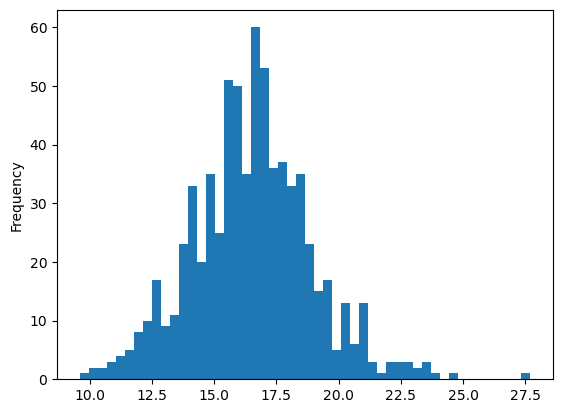

In [11]:
df['Student_teacher_ratio'].plot(kind='hist', bins=50)

In [12]:
import numpy as np

In [13]:
bins = np.linspace(df['Student_teacher_ratio'].min(), df['Student_teacher_ratio'].max(), 10)
bins

array([ 9.6       , 11.61111111, 13.62222222, 15.63333333, 17.64444444,
       19.65555556, 21.66666667, 23.67777778, 25.68888889, 27.7       ])

In [14]:
table = df.pivot_table(index='State', columns=pd.cut(df['Student_teacher_ratio'], bins), aggfunc='size')

/var/folders/1c/xcwp8_px05xg1_3xd9nn9qhm0000gn/T/ipykernel_32874/303150177.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = df.pivot_table(index='State', columns=pd.cut(df['Student_teacher_ratio'], bins), aggfunc='size')


In [15]:
table

Student_teacher_ratio,"(9.6, 11.611]","(11.611, 13.622]","(13.622, 15.633]","(15.633, 17.644]","(17.644, 19.656]","(19.656, 21.667]","(21.667, 23.678]","(23.678, 25.689]","(25.689, 27.7]"
State,,,,,,,,,
AK,0,1,4,3,3,3,0,0,1
AL,0,0,0,11,3,0,0,0,0
AR,0,0,0,16,2,0,0,0,0
AZ,0,0,0,1,2,1,1,0,0
CA,0,0,0,0,0,5,11,2,0
CO,1,1,4,6,4,1,0,0,0
CT,0,0,1,0,0,0,0,0,0
DC,0,0,0,0,1,0,0,0,0
DE,0,0,0,1,1,0,0,0,0


In [16]:
import matplotlib.pyplot as plt

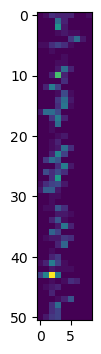

In [17]:
fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(table.values)
ax.set_yticks(range(len(table.index))
plt.show()